In [19]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [20]:
import pickle

In [21]:
import matplotlib.pyplot as plt
import arviz as az
import corner

In [22]:
import jax
import jax.numpy as jnp

In [66]:
import antiglitch
from antiglitch import freqs, rfft, irfft

In [109]:
result = {}
for ifo in ['H1','L1']:
    for key in ['blip', 'koi', 'tomte']:
        with open(f"{ifo}-{key}-results.pkl", 'rb') as handle:
            tmp = pickle.load(handle)
        for ii in range(100):
            means = tmp[(ifo, key, ii)]['mean']
            sds = tmp[(ifo, key, ii)]['sd']
            dct = {k: val for k, val in means.items()}
            dct = dct | {k+'_sd': val for k, val in sds.items()}
            dct['amp_c'] = dct['amp_r'] + 1.j*dct['amp_i']
            result[(ifo, key, ii)] = dct

In [110]:
import pandas as pd
df = pd.DataFrame.from_dict(result, orient='index')

In [111]:
h1blip = df.loc[[('H1','blip',ii) for ii in range(100)]]
h1koi = df.loc[[('H1','koi',ii) for ii in range(100)]]
h1tomte = df.loc[[('H1','tomte',ii) for ii in range(100)]]
l1blip = df.loc[[('L1','blip',ii) for ii in range(100)]]
l1koi = df.loc[[('L1','koi',ii) for ii in range(100)]]
l1tomte = df.loc[[('L1','tomte',ii) for ii in range(100)]]

In [165]:
stack = 0.
pred = 0.
accum = []
for ii in range(100):
    key = ('L1','tomte',ii)
    inf = result[key]
    if inf['amp_r'] > 0:
        snip = antiglitch.Snippet(*key)
        snip.set_infer(inf)
        stack += rfft(snip.whts)*np.exp(1.j*inf['time']*freqs)
        pred += rfft(snip.glitch)*np.exp(1.j*inf['time']*freqs)
        accum.append(rfft(snip.whts)*np.exp(1.j*inf['time']*freqs))

(0.001, 100)

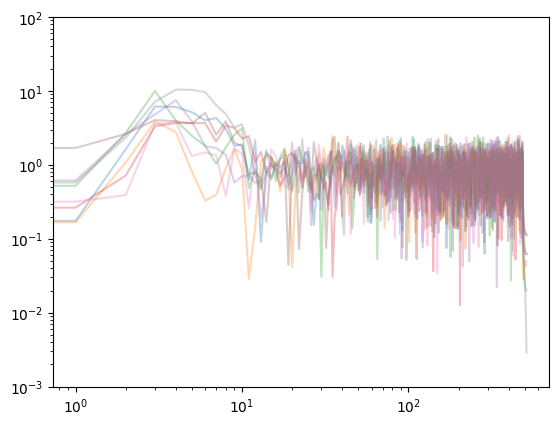

In [166]:
for pl in accum:
    plt.loglog(np.abs(pl) , alpha=0.3)
plt.ylim(1e-3, 100)

(448.0, 576.0)

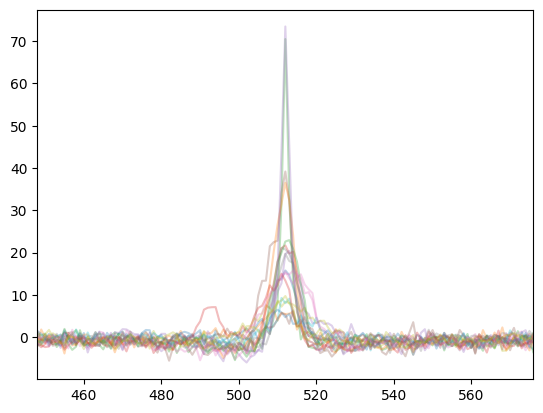

In [141]:
for pl in accum:
    plt.plot(irfft(pl), alpha=0.3)
plt.xlim(512-64, 512+64)

(448.0, 576.0)

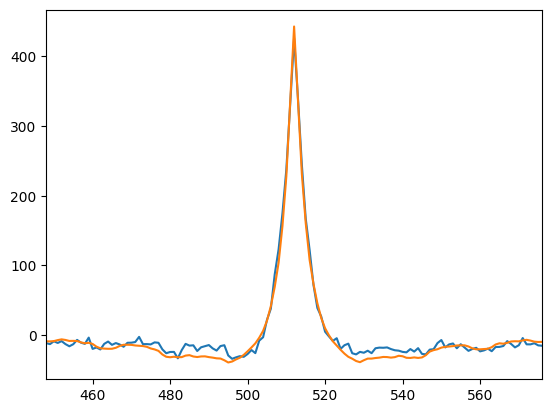

In [142]:
plt.plot(irfft(stack))
plt.plot(irfft(pred))
plt.xlim(512-64, 512+64)

(1, 100.0)

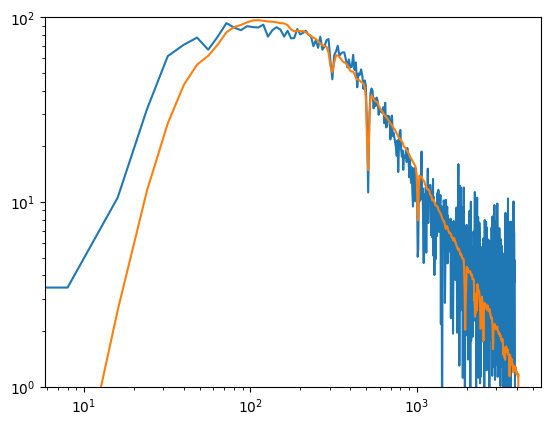

In [143]:
plt.loglog(np.linspace(0,4096,513), np.abs(stack))
plt.loglog(np.linspace(0,4096,513), np.abs(pred))
plt.ylim(1,1e2)

(-300.0, 300.0)

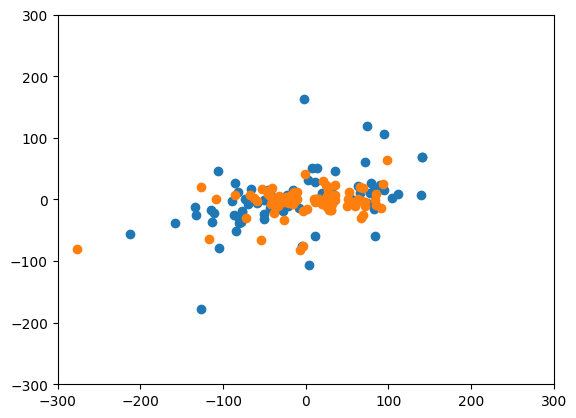

In [105]:
plt.scatter(h1blip['amp_r'], h1blip['amp_i']);
plt.scatter(l1blip['amp_r'], l1blip['amp_i']);
plt.xlim(-300,300)
plt.ylim(-300,300)

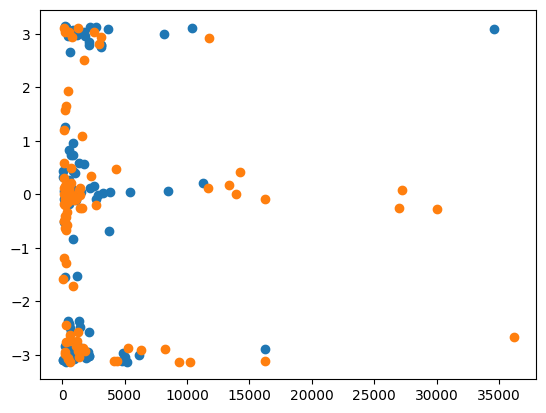

In [116]:
plt.scatter(np.abs(h1koi['amp_c']), np.angle(h1koi['amp_c']))
plt.scatter(np.abs(l1koi['amp_c']), np.angle(l1koi['amp_c']))

In [132]:
def fix_angles(x):
    return np.where(x > -np.pi/2, x, x+2*np.pi)

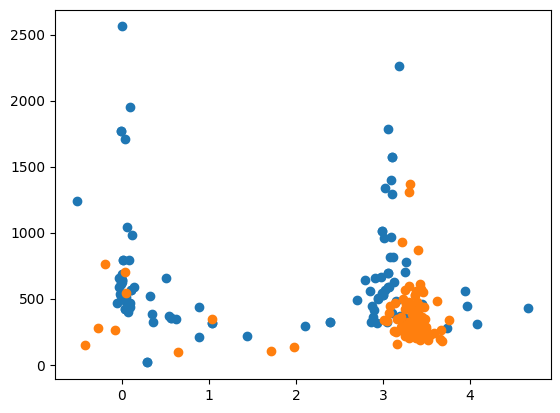

In [134]:
plt.scatter(fix_angles(np.angle(h1tomte['amp_c'])), np.abs(h1tomte['amp_c']))
plt.scatter(fix_angles(np.angle(l1tomte['amp_c'])), np.abs(l1tomte['amp_c']))

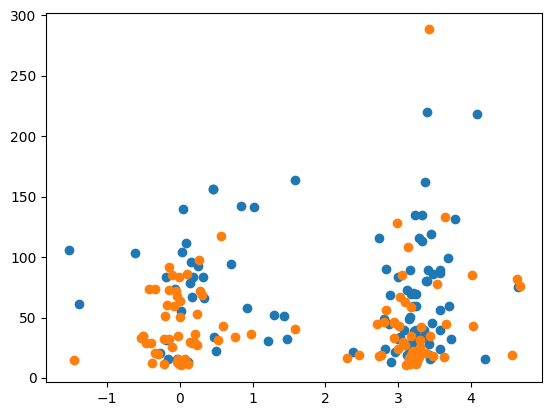

In [135]:
plt.scatter(fix_angles(np.angle(h1blip['amp_c'])), np.abs(h1blip['amp_c']))
plt.scatter(fix_angles(np.angle(l1blip['amp_c'])), np.abs(l1blip['amp_c']))

(-2000.0, 2000.0)

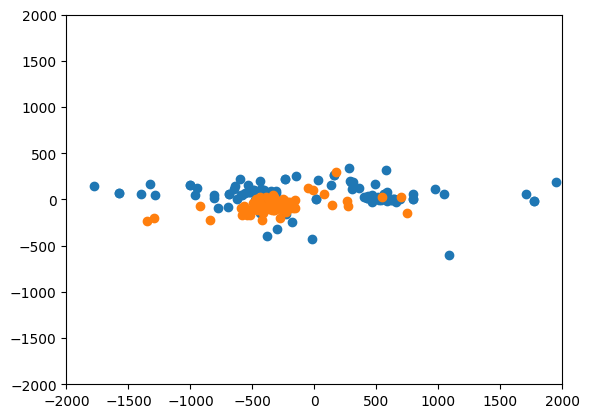

In [40]:
plt.scatter(h1tomte['amp_r'], h1tomte['amp_i']);
plt.scatter(l1tomte['amp_r'], l1tomte['amp_i']);
plt.xlim(-2000,2000)
plt.ylim(-2000,2000)

In [144]:
np.arange(100)[h1tomte['amp_r'] > 1000]

array([12, 20, 22, 23, 48, 54, 63])

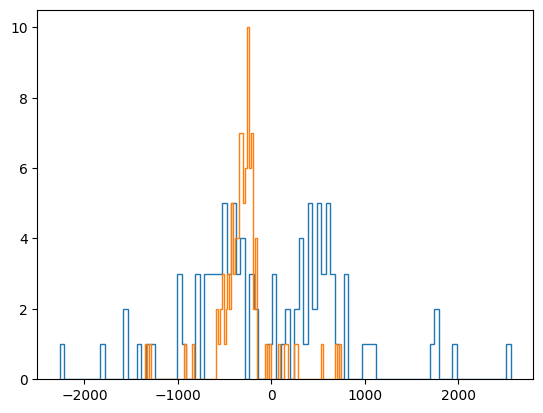

In [38]:
plt.hist(h1tomte['amp_r'], bins=100, histtype='step');
plt.hist(l1tomte['amp_r'], bins=100, histtype='step');

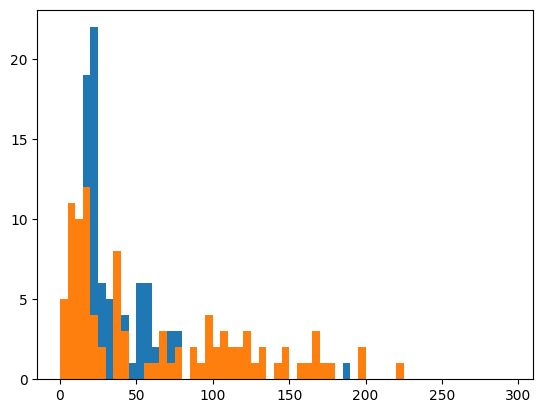

In [403]:
plt.hist((4096/np.pi)*h1koi['f0'], bins=np.arange(0,300,5));
plt.hist((4096/np.pi)*l1koi['f0'], bins=np.arange(0,300,5));

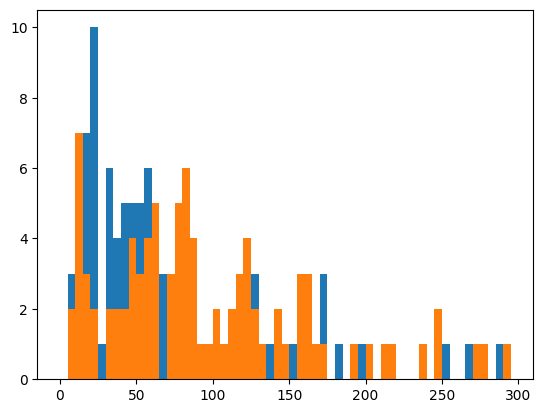

In [401]:
plt.hist((4096/np.pi)*h1blip['f0'], bins=np.arange(0,300,5));
plt.hist((4096/np.pi)*l1blip['f0'], bins=np.arange(0,300,5));

In [405]:
np.mean((4096/np.pi)*h1tomte['f0']), np.mean((4096/np.pi)*l1tomte['f0'])

(22.125440075935444, 17.470883737038008)

In [410]:
np.median(h1tomte['gbw']), np.median(l1tomte['gbw'])

(3.433, 2.348)

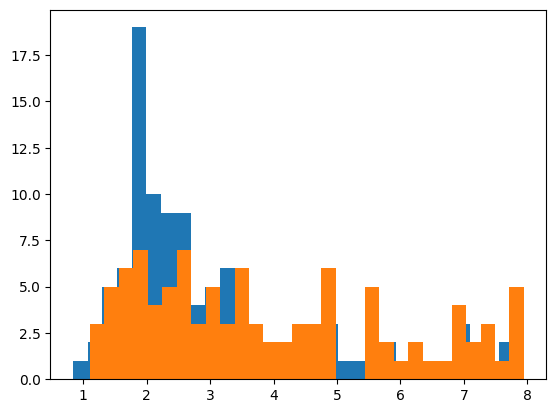

In [411]:
plt.hist(l1tomte['gbw'], bins=30);
plt.hist(h1tomte['gbw'], bins=30);

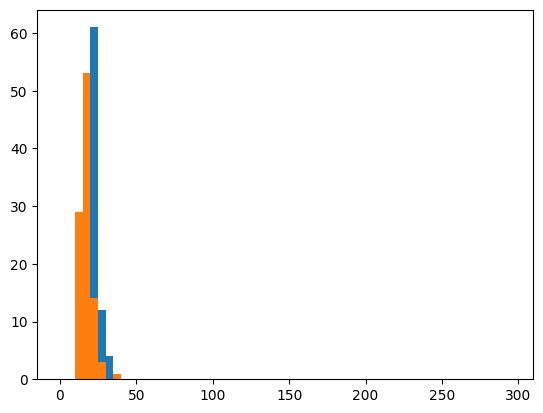

In [402]:
plt.hist((4096/np.pi)*h1tomte['f0'], bins=np.arange(0,300,5));
plt.hist((4096/np.pi)*l1tomte['f0'], bins=np.arange(0,300,5));

In [366]:
inf = result[('L1', 'blip', 0)].copy()

In [368]:
inf['time'] = 0.

(384.0, 640.0)

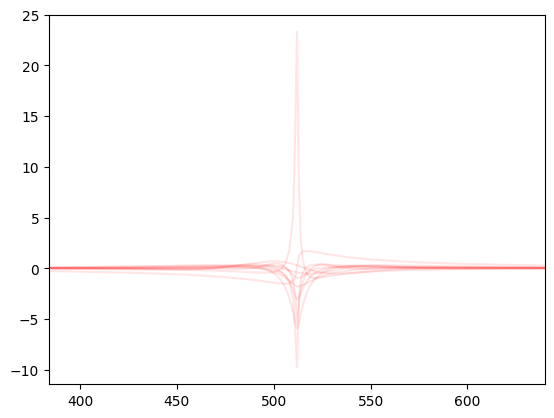

In [391]:
for ii in range(10):
    inf = result[('H1', 'blip', ii)].copy()
    inf['time'] = 0.
    snip = glitchmodel.Snippet('H1','blip',ii)
    snip.set_infer(inf)
    tmp = glitchmodel.center(irfft(snip.fglitch))
    plt.plot(tmp, c='r', alpha=0.1)
plt.xlim(512-128,512+128)

(0.001, 1000.0)

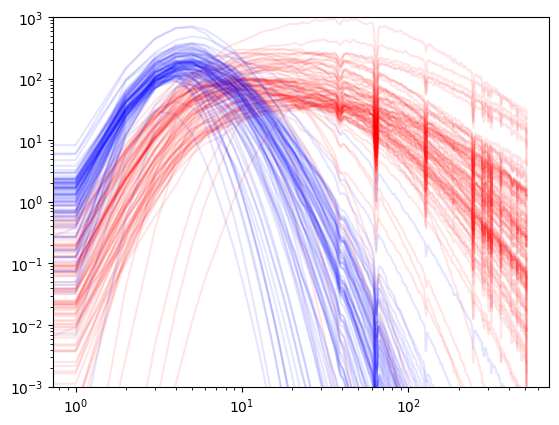

In [354]:
for ii in range(100):
    snip = glitchmodel.Snippet('L1','blip',ii)
    snip.set_infer(result[('L1', 'blip', ii)])
    plt.loglog(np.abs(rfft(snip.glitch)), c='r', alpha=0.1)

for ii in range(100):
    snip = glitchmodel.Snippet('L1','tomte',ii)
    snip.set_infer(result[('L1', 'tomte', ii)])
    plt.loglog(np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
plt.ylim(1e-3,1e3)

(0.001, 1000.0)

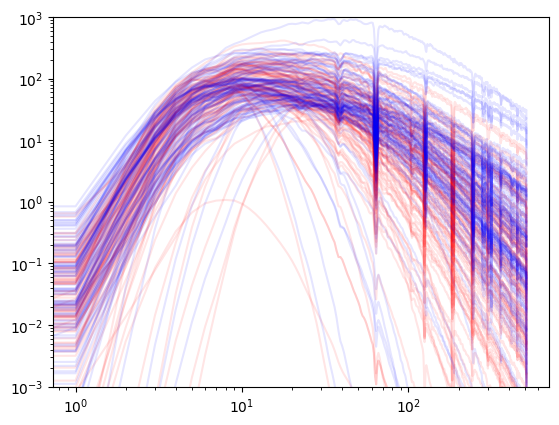

In [353]:
for ii in range(100):
    snip = glitchmodel.Snippet('H1','blip',ii)
    snip.set_infer(result[('H1', 'blip', ii)])
    plt.loglog(np.abs(rfft(snip.glitch)), c='r', alpha=0.1)

for ii in range(100):
    snip = glitchmodel.Snippet('L1','blip',ii)
    snip.set_infer(result[('L1', 'blip', ii)])
    plt.loglog(np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
plt.ylim(1e-3,1e3)

In [316]:
all_f0 = np.concatenate([h1blip['f0'], l1blip['f0'], h1koi['f0'], l1koi['f0']])
all_gbw = np.concatenate([h1blip['gbw'], l1blip['gbw'], h1koi['gbw'], l1koi['gbw']])**-0.5

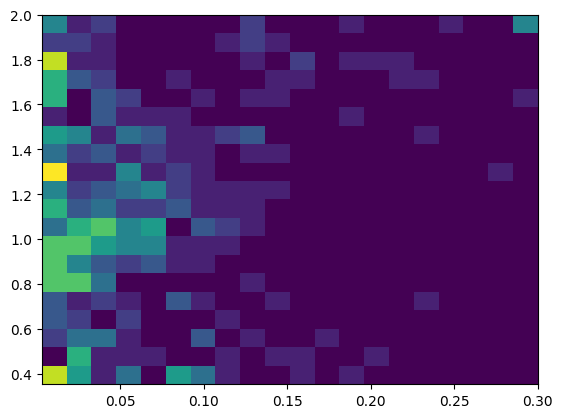

In [320]:
plt.hist2d(all_f0, all_gbw, bins=(20,20));

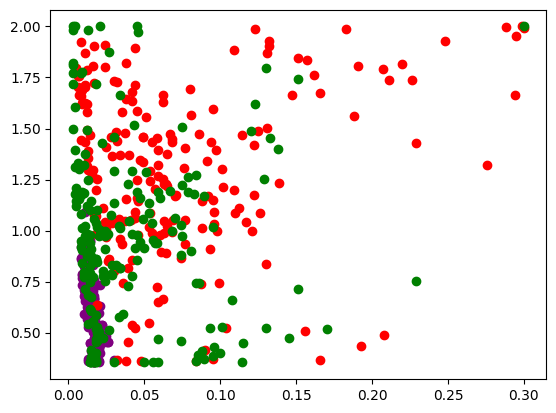

In [314]:
plt.scatter(h1tomte['f0'], h1tomte['gbw']**-0.5, c='purple')
plt.scatter(l1tomte['f0'], l1tomte['gbw']**-0.5, c='purple')
plt.scatter(h1blip['f0'], h1blip['gbw']**-0.5, c='r')
plt.scatter(l1blip['f0'], l1blip['gbw']**-0.5, c='r')
plt.scatter(h1koi['f0'], h1koi['gbw']**-0.5, c='g')
plt.scatter(l1koi['f0'], l1koi['gbw']**-0.5, c='g')

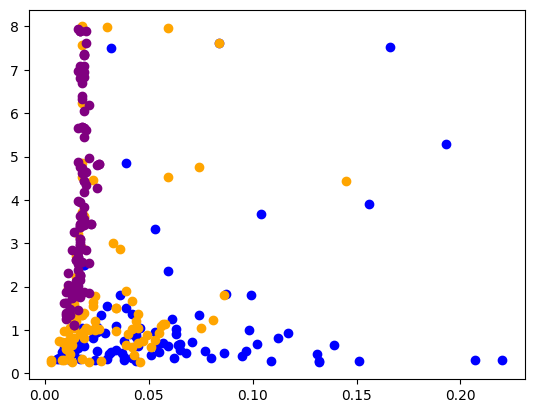

In [69]:
plt.scatter(h1blip['f0'], h1blip['gbw'], c='b')
plt.scatter(h1koi['f0'], h1koi['gbw'], c='orange')
plt.scatter(h1tomte['f0'], h1tomte['gbw'], c='purple')

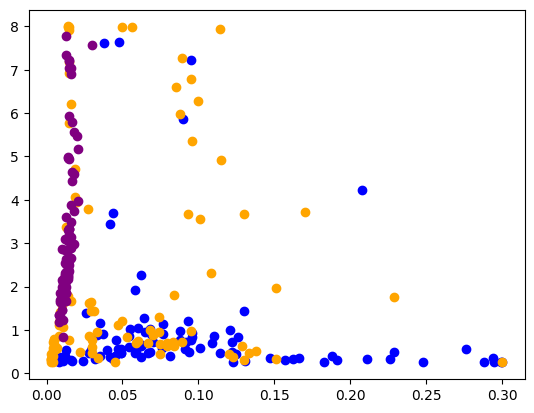

In [70]:
plt.scatter(l1blip['f0'], l1blip['gbw'], c='b')
plt.scatter(l1koi['f0'], l1koi['gbw'], c='orange')
plt.scatter(l1tomte['f0'], l1tomte['gbw'], c='purple')

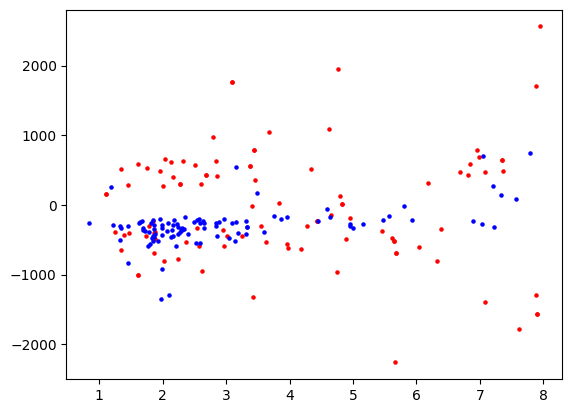

In [71]:
plt.scatter(h1tomte['gbw'], h1tomte['amp_r'], c='r', s=5)
plt.scatter(l1tomte['gbw'], l1tomte['amp_r'], c='b', s=5)

(-800.0, 800.0)

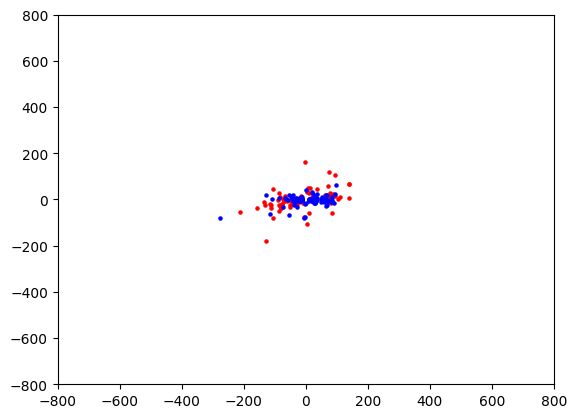

In [357]:
plt.scatter(h1blip['amp_r'], h1blip['amp_i'], c='r', s=5)
plt.scatter(l1blip['amp_r'], l1blip['amp_i'], c='b', s=5)
plt.xlim(-800,800)
plt.ylim(-800,800)

(-3000.0, 3000.0)

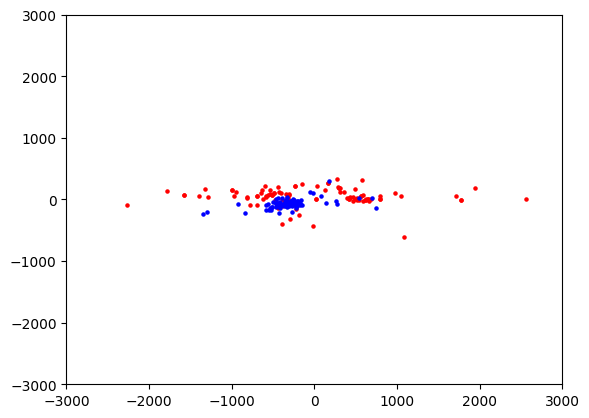

In [355]:
plt.scatter(h1tomte['amp_r'], h1tomte['amp_i'], c='r', s=5)
plt.scatter(l1tomte['amp_r'], l1tomte['amp_i'], c='b', s=5)
plt.xlim(-3000,3000)
plt.ylim(-3000,3000)

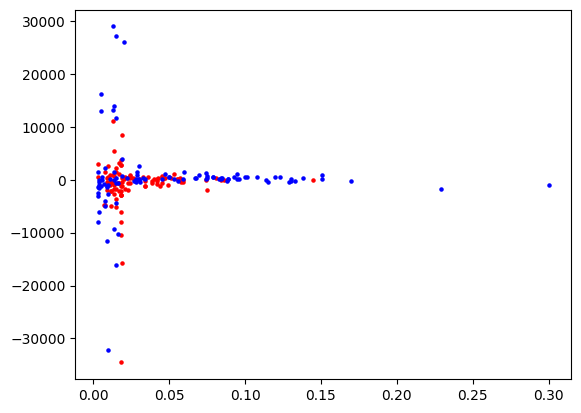

In [73]:
plt.scatter(h1koi['f0'], h1koi['amp_r'], c='r', s=5)
plt.scatter(l1koi['f0'], l1koi['amp_r'], c='b', s=5)

In [74]:
plt.scatter(h1blip['f0'], h1blip['amp'], c='r', s=5)
plt.scatter(l1blip['f0'], l1blip['amp'], c='b', s=5)

KeyError: 'amp'

In [75]:
plt.scatter(l1koi['f0'], l1koi['f0_sd'], c=l1koi['amp'], s=5)

KeyError: 'amp'

In [76]:
result[('L1', 'koi', 6)]

{'amp_i': 50.955,
 'amp_r': -510.271,
 'f0': 0.115,
 'gbw': 4.917,
 'time': 3.099,
 'amp_i_sd': 4.364,
 'amp_r_sd': 1.682,
 'f0_sd': 0.0,
 'gbw_sd': 0.031,
 'time_sd': 0.061}

In [77]:
result[('L1','koi',0)]

{'amp_i': -42.691,
 'amp_r': 217.327,
 'f0': 0.089,
 'gbw': 0.733,
 'time': 4.112,
 'amp_i_sd': 1.625,
 'amp_r_sd': 1.259,
 'f0_sd': 0.002,
 'gbw_sd': 0.014,
 'time_sd': 0.032}

In [78]:
result[('L1', 'koi', 11)]

{'amp_i': 8.072,
 'amp_r': 514.501,
 'f0': 0.123,
 'gbw': 0.38,
 'time': 5.734,
 'amp_i_sd': 1.111,
 'amp_r_sd': 0.913,
 'f0_sd': 0.001,
 'gbw_sd': 0.003,
 'time_sd': 0.005}

In [79]:
result[('L1', 'koi', 13)]

{'amp_i': 140.856,
 'amp_r': 654.646,
 'f0': 0.075,
 'gbw': 0.44,
 'time': 7.112,
 'amp_i_sd': 1.328,
 'amp_r_sd': 1.496,
 'f0_sd': 0.001,
 'gbw_sd': 0.004,
 'time_sd': 0.006}

In [80]:
result[('L1', 'koi', 16)]

{'amp_i': -545.165,
 'amp_r': 2634.822,
 'f0': 0.03,
 'gbw': 0.779,
 'time': 2.522,
 'amp_i_sd': 4.096,
 'amp_r_sd': 6.937,
 'f0_sd': 0.0,
 'gbw_sd': 0.003,
 'time_sd': 0.012}

In [81]:
result[('H1', 'tomte', 17)]

{'amp_i': 163.132,
 'amp_r': -1324.319,
 'f0': 0.017,
 'gbw': 3.428,
 'time': 0.749,
 'amp_i_sd': 38.557,
 'amp_r_sd': 65.572,
 'f0_sd': 0.001,
 'gbw_sd': 0.186,
 'time_sd': 0.844}

In [82]:
res11 = result[('L1', 'koi', 13)]

In [83]:
res11 = {'amp': 13.503,
 'f0': 0.112,
 'gbw': 0.5,
 'phase': 0.,
 'sigma': 2.419,
 'time': 3.718}

In [ ]:
snip = glitchmodel.Snippet('L1','koi',42)
snip.set_infer(result[('L1', 'koi', 42)])
snip.plot()

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

In [233]:
result[('L1', 'koi', 0)]

{'amp_i': -42.691,
 'amp_r': 217.327,
 'f0': 0.089,
 'gbw': 0.733,
 'time': 4.112,
 'amp_i_sd': 1.625,
 'amp_r_sd': 1.259,
 'f0_sd': 0.002,
 'gbw_sd': 0.014,
 'time_sd': 0.032}

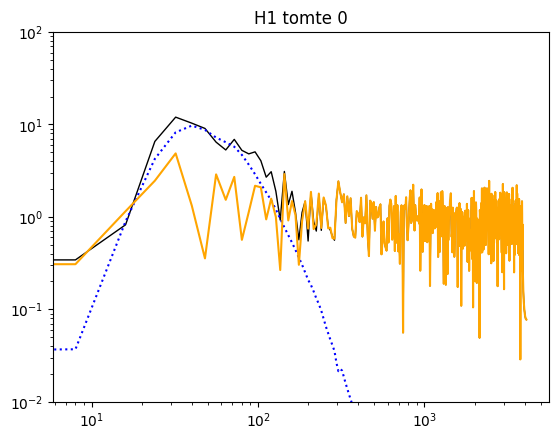

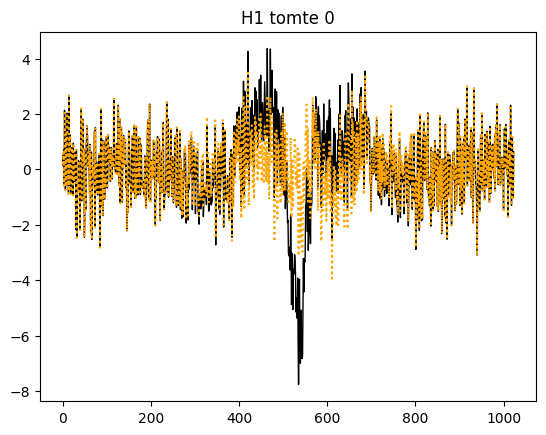

In [234]:
for ii in range(0, 1):
    sel = ('H1', 'tomte', ii)
    snip = glitchmodel.Snippet(*sel)
    snip.set_infer(result[sel])
    snip.plot()
    plt.title(f"{sel[0]} {sel[1]} {ii}")

In [257]:
def fwidth(f0, Q):
    qprime = Q / 11**(1/2.)
    return f0 / qprime

ftiles = np.logspace(np.log10(16.), np.log10(1200.), 200)


from jax.numpy.fft import ifft
from jax import grad, jit, vmap
def qseries(fseries, Q, duration_secs, tlen):
    qprime = Q / 11**(1/2.)
    workspaces = []
    for f0 in ftiles:
        halfwin = (f0 / qprime * duration_secs).astype(int)

        middle = (f0 * duration_secs).astype(int)
        start = middle - halfwin
        end = middle + halfwin + 1

        xfrequencies = jnp.linspace(-1., 1., 2*halfwin+1)
        window = (1 - xfrequencies ** 2) ** 2
        norm = 1./jnp.sqrt(jnp.sum(window**2))
        
        windowed = fseries[start:end] * window

        workspace = jnp.zeros(tlen, dtype = fseries.dtype)
        workspace = workspace.at[0:halfwin+1].set(norm*windowed[halfwin:])
        workspace = workspace.at[-halfwin:].set(norm*windowed[:halfwin])
        workspaces.append(workspace)
    
    # calculate the time series for this q -value

    return vmap(ifft)(jnp.array(workspaces))

In [361]:
import importlib as imp
imp.reload(glitchmodel)

<module 'glitchmodel' from '/nfshome/store01/users/andrew.lundgren/detchar/GlitchSearch/glitchmodel.py'>

In [362]:
snip = glitchmodel.Snippet('H1','tomte', 59)
snip.set_infer(result[('H1', 'tomte', 59)])

/nfshome/store01/users/andrew.lundgren/detchar/GlitchSearch/glitchmodel.py:25: RuntimeWarning: divide by zero encountered in power
  invasd = ((4096.*npz['psd'])**-0.5)[:4097]


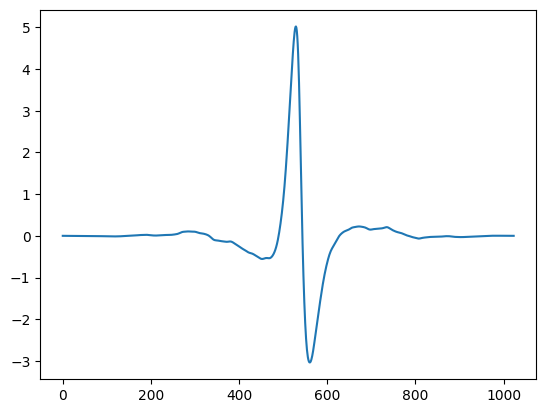

In [363]:
plt.plot(snip.glitch)

In [336]:
fdata = jnp.array(rfft(snip.whts))
fglitch = jnp.array(rfft(snip.glitch))

In [ ]:
from jax.numpy.fft import rfft, irfft, fft, ifft
from jax import grad, jit, vmap
Q = 12.

dresult = jnp.array(qseries(fdata, Q, 0.25, 1024))

gresult = jnp.array(qseries(fglitch, Q, 0.25, 1024))

sresult = jnp.array(qseries(fdata - fglitch, Q, 0.25, 1024))

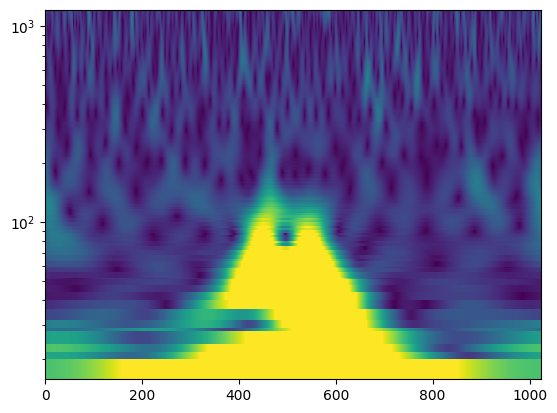

In [343]:
plt.pcolormesh(np.arange(1024), ftiles, np.abs(dresult), vmin=0, vmax = 0.2)
plt.yscale('log')

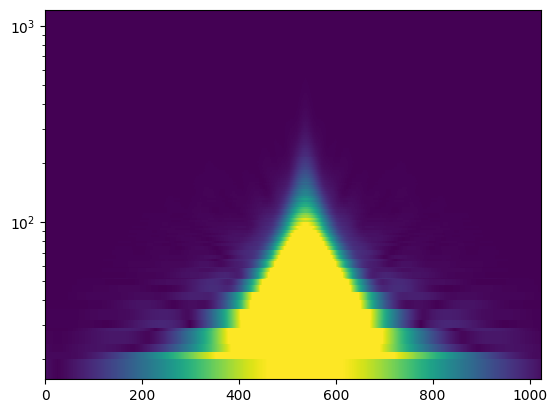

In [346]:
plt.pcolormesh(np.arange(1024), ftiles, np.abs(gresult), vmin=0, vmax = 0.2)
plt.yscale('log')

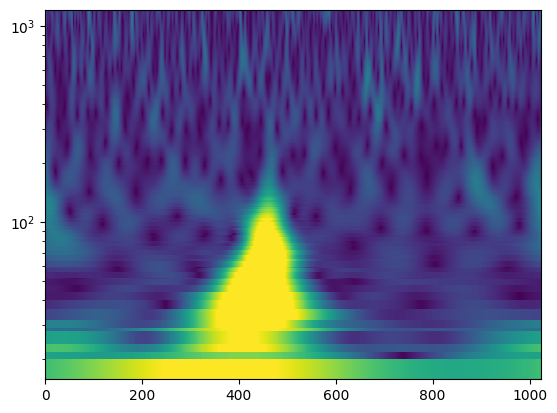

In [347]:
plt.pcolormesh(np.arange(1024), ftiles, np.abs(sresult), vmin=0, vmax = 0.2)
plt.yscale('log')

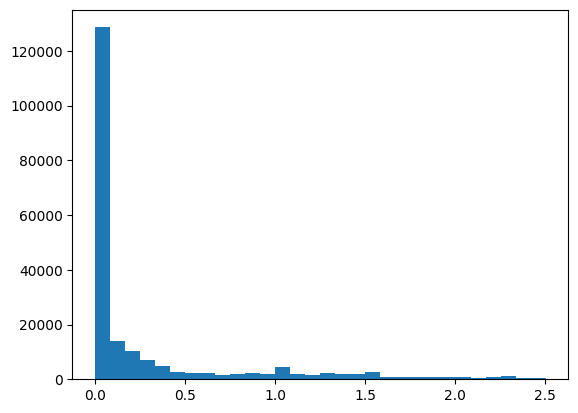

In [279]:
plt.hist(np.abs(dresult).ravel(), bins=30);

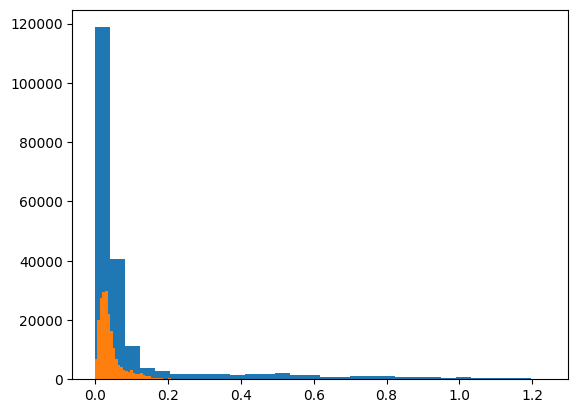

In [185]:
plt.hist(np.abs(dresult).ravel(), bins=30);
plt.hist(np.abs(sresult).ravel(), bins=30);

In [86]:
1000/(30*0.5*86400)

0.0007716049382716049

In [89]:
0.0007*0.0007*0.02

9.8e-09

In [94]:
(9.8e-09*3.15e7)

0.30870000000000003

In [154]:
def qwindow(f0, Q):
    tlen = 1./8
    qprime = Q / 11**(1/2.)
    
    halfwin = int(f0 / qprime * tlen) # .astype(int)
    
    middle = int(f0 * tlen)  #.astype(int)
    start = middle - halfwin
    end = middle + halfwin + 1
        

    xfrequencies = np.linspace(-1., 1., 2*halfwin+1)
    window = (1 - xfrequencies ** 2) ** 2
    
    windowed = np.zeros(513)
    windowed[start:end] = window
    
    return windowed

(1, 100.0)

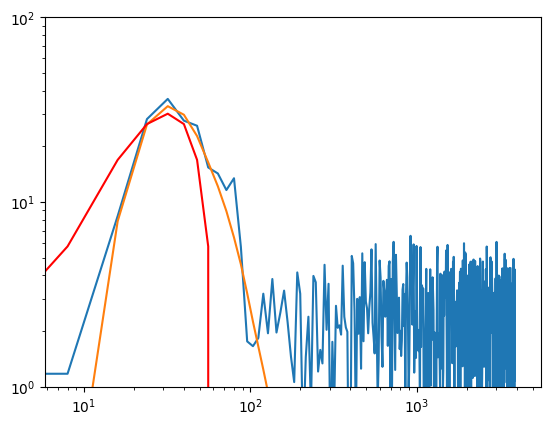

In [178]:
plt.loglog(np.linspace(0,4096,513), np.abs(stack))
plt.loglog(np.linspace(0,4096,513), np.abs(pred))
plt.loglog(np.linspace(0, 4096, 513), 30*qwindow(38, 3.5), c='r')
plt.ylim(1,1e2)